# **Mini Project 2**
# **Investigating Netflix Movies**

![My image](download.jpg)

# **Part 1**

In [53]:
import pandas as pd

netflix = pd.read_csv("netflix_data.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## **What was the most frequent movie duration in the 1990s?**

In [370]:
movies = netflix[(netflix['type'].str.lower() == 'movie')]
movies_90s = movies[(movies['release_year'].between(1990, 1999))]
movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [225]:
most_frequent_duration_values = movies_90s['duration'].value_counts(normalize=True)
most_frequent_duration_values

duration
94     0.041237
101    0.030928
93     0.025773
95     0.025773
108    0.025773
         ...   
189    0.005155
28     0.005155
98     0.005155
58     0.005155
191    0.005155
Name: proportion, Length: 95, dtype: float64

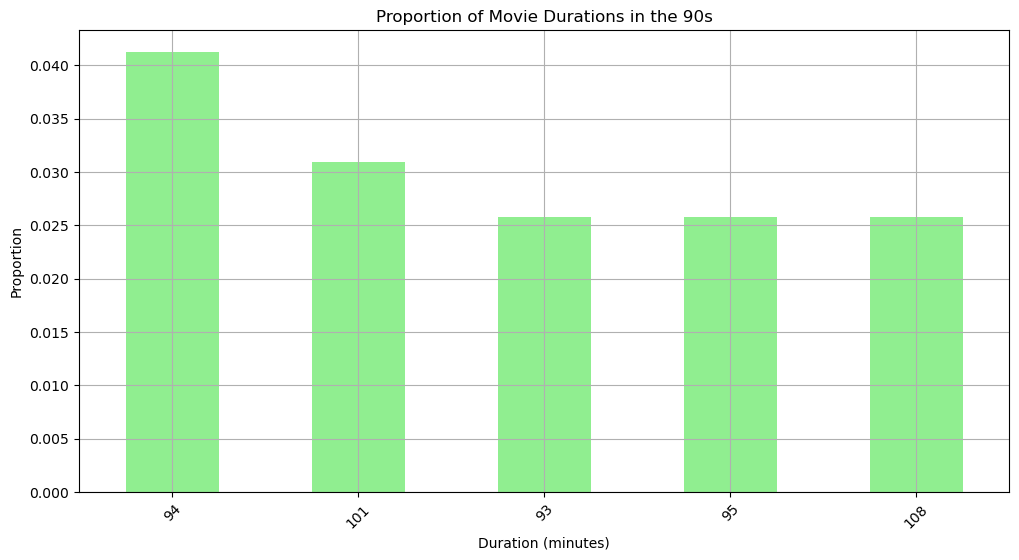

In [236]:
import matplotlib.pyplot as plt

most_frequent_duration_values.head().plot(kind='bar', color='lightgreen', figsize=(12, 6))
plt.title('Proportion of Movie Durations in the 90s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [245]:
most_frequent_duration = movies_90s['duration'].mode()[0]
most_frequent_duration

94

### **The most frequent movie duration is:**
94

## **A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.**

In [265]:
short_action_movies = movies_90s[(movies_90s['duration'] < 90) & 
                                 (movies_90s['genre'].str.contains('Action', case=False))] # case insensitive
short_action_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2038,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
2707,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
3717,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
4422,s4423,Movie,National Lampoon's Loaded Weapon 1,Gene Quintano,"Emilio Estevez, Samuel L. Jackson, Jon Lovitz,...",NaN,"November 1, 2019",1993,82,"In this parody of the Lethal Weapon franchise,...",Action
4786,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
5298,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
6113,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
6329,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [339]:
short_movie_count = short_action_movies.shape[0] # number of rows
short_movie_count

8

**The number of action movies released in the 1990s less than 90 minutes: 8**
8

# **Part 2**

In [342]:
missing_data = movies.isnull().sum()
missing_data

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

In [306]:
# remove missing rows with missing data
movies_cleaned = movies.dropna()
movies_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [628]:
# handling duplicates
movies_cleaned.duplicated().sum()

0

In [630]:
movies_cleaned.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [326]:
movies_cleaned.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [330]:
len(movies)

5377

In [586]:
len(movies_cleaned)

4677

## **Determine whether the average duration of movies on Netflix has been declining over the years.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
movies_duration_year = movies.groupby('release_year')['duration'].mean().reset_index()
movies_duration_year

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
67,2017,94.836022
68,2018,96.170300
69,2019,93.457045
70,2020,89.795620


#### **Line plot**

In [94]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

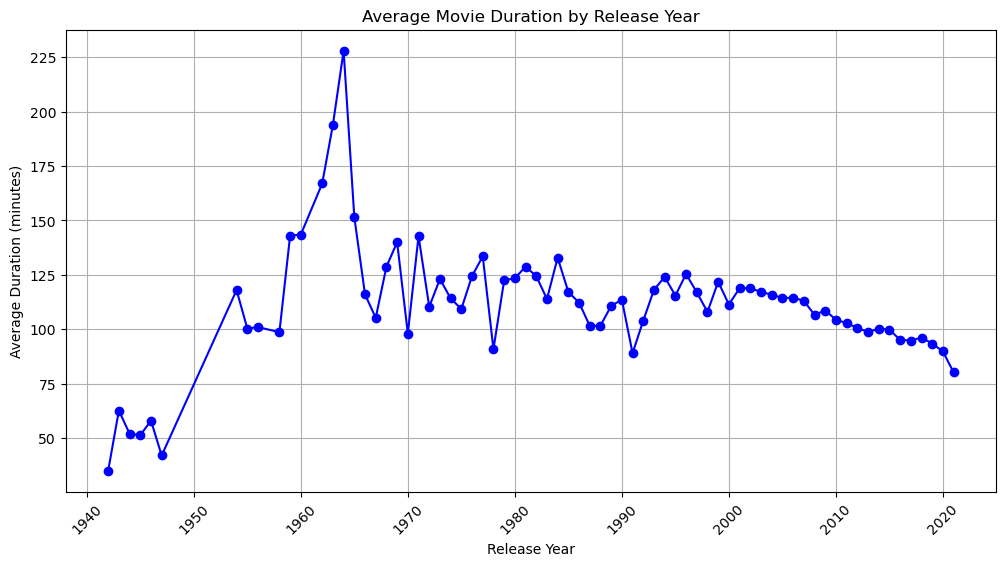

In [408]:
plt.figure(figsize =(12,6))
plt.plot(movies_duration_year['release_year'], movies_duration_year['duration'], 
         marker='o', linestyle='-', color='blue')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid()
plt.xticks(rotation=45)
plt.show

#### **Bar plot**

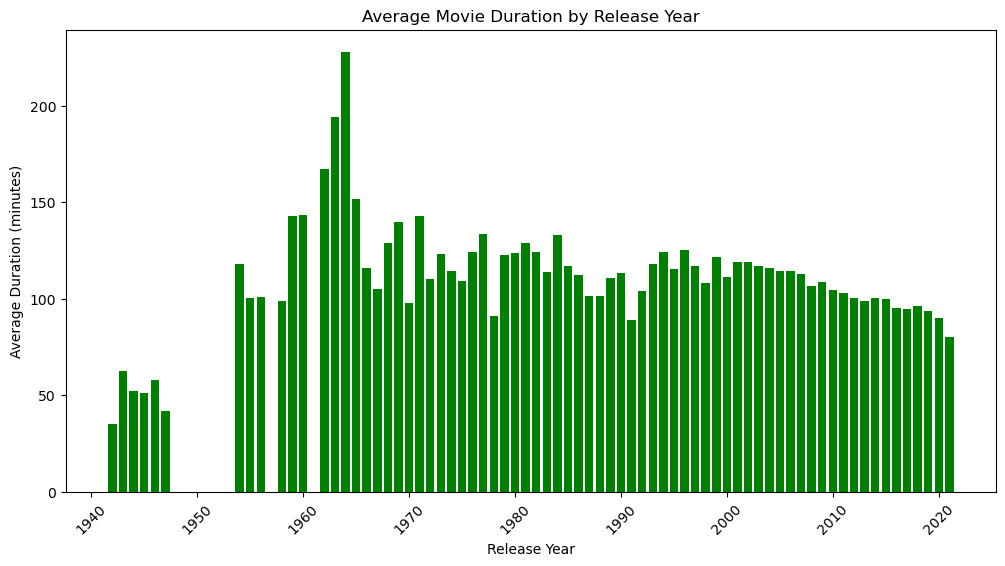

In [119]:
plt.figure(figsize=(12,6))
plt.bar(movies_duration_year['release_year'], movies_duration_year['duration'], color='g')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

#### **Area plot**

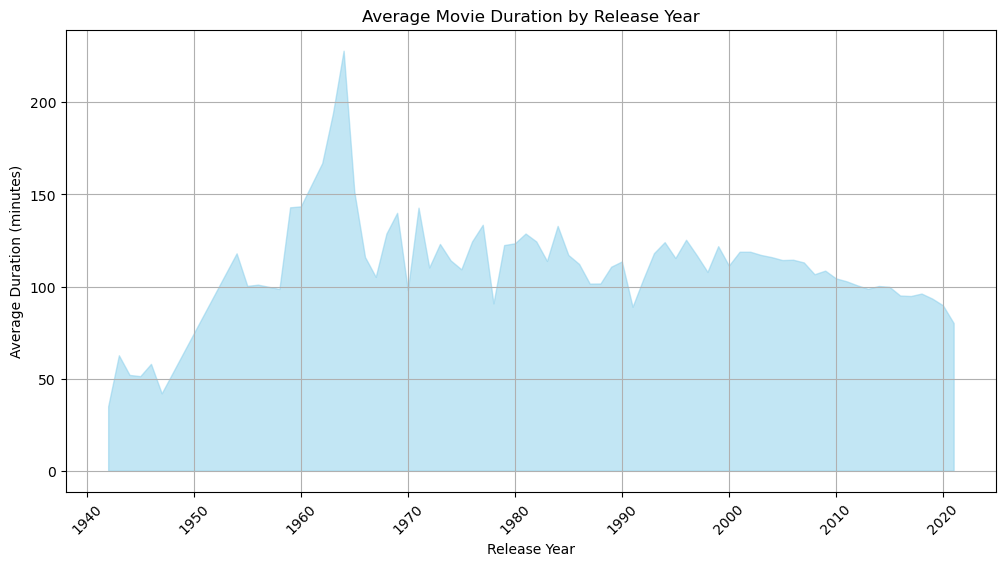

In [151]:
plt.figure(figsize=(12, 6))
plt.fill_between(movies_duration_year['release_year'], movies_duration_year['duration'], color='skyblue', alpha=0.5)
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Here are Line plot, Bar plot, and Area plot of Average Movie Duration by Release Year. According to charts, we can tell there was an upward trend in longer duration from 1940, and started declining big after a peak/maximum between 1960 and 1970. The graph shows duration's constantly declining over the year.**

#### **1960-1970**

In [129]:
duration_decline = movies_duration_year[(movies_duration_year['release_year'] >= 1960) &
                                        (movies_duration_year['release_year'] <= 1970)]
duration_decline

,release_year,duration
11,1960,143.50
12,1962,167.00
13,1963,194.00
14,1964,228.00
15,1965,151.50
16,1966,116.00
17,1967,105.25
18,1968,128.75
19,1969,140.00
20,1970,98.00


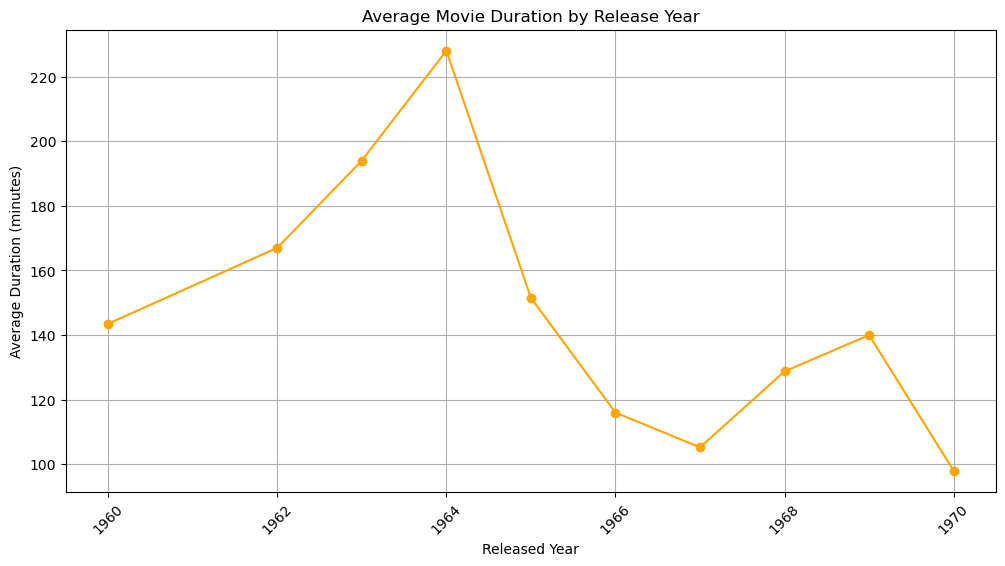

In [145]:
plt.figure(figsize=(12,6))
plt.plot(duration_decline['release_year'], duration_decline['duration'], marker='o', linestyle='-', color='orange')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Released Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**There was a biggest drop of average duration of movies between 1964 and 1966**

#### **1940-1964**

In [427]:
duration_incline = movies_duration_year[(movies_duration_year['release_year'] >= 1940) &
                                        (movies_duration_year['release_year'] <= 1964)]
duration_incline.head()

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000


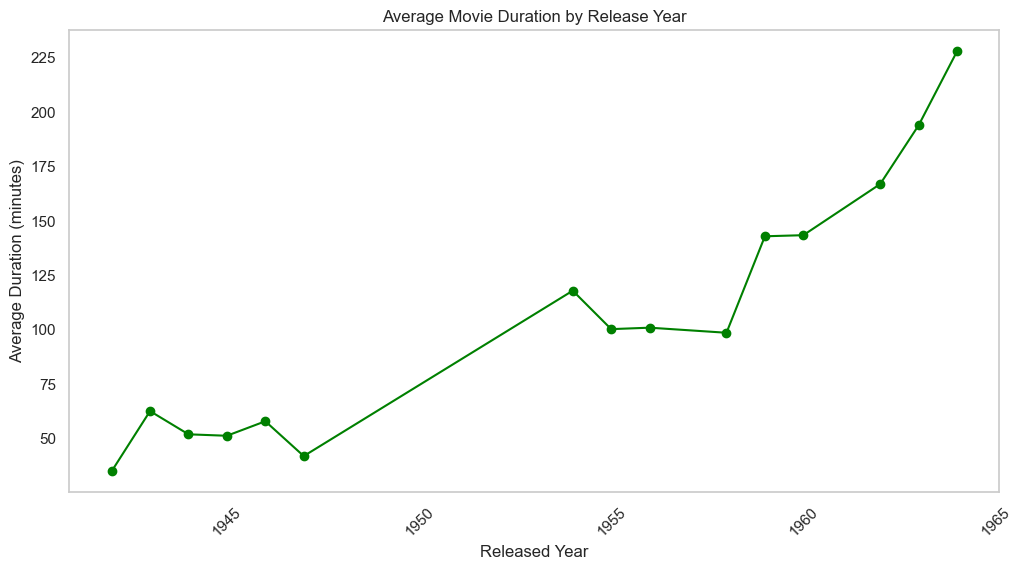

In [429]:
plt.figure(figsize=(12,6))
plt.plot(duration_incline['release_year'], duration_incline['duration'], marker='o', linestyle='-', color='green')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Released Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**There'd been a few times of fall, other than that, this chart shows how the duration'd been increasing between 1945 and 1964 which is the peak.**

**For a longer period of time, the trend shows shorter durations of movies.**

### **Correlation in Genre, Release Year, and Duration**

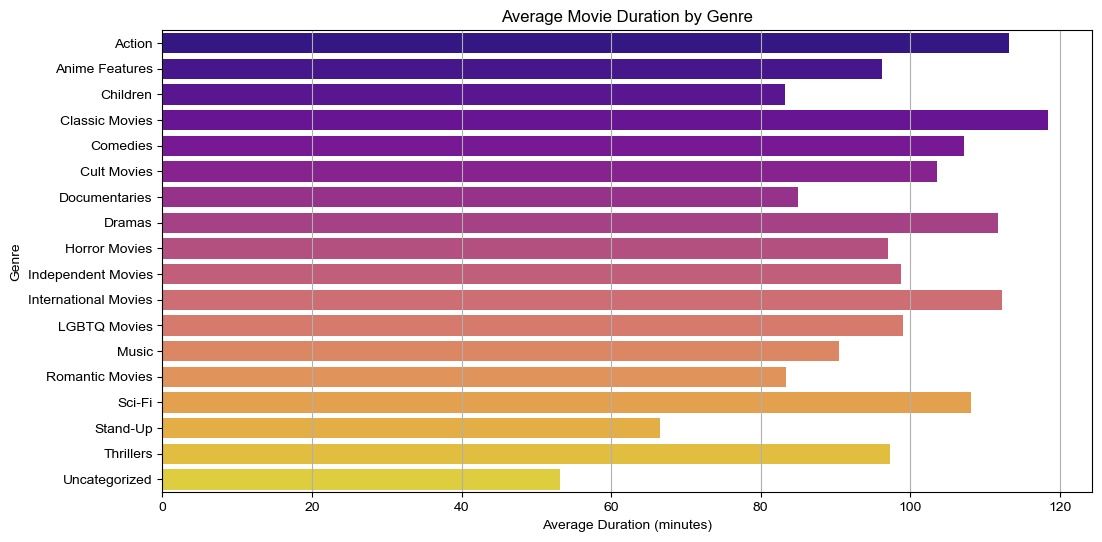

In [422]:
average_duration_per_genre = movies_cleaned.groupby('genre')['duration'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=average_duration_per_genre, x='duration', y='genre', palette='plasma', hue='genre')
sns.set(style='whitegrid')
# plt.barh(average_duration_per_genre['genre'], average_duration_per_genre['duration'])
plt.title('Average Movie Duration by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()

In [632]:
average_duration_year_genre = movies_cleaned.groupby(['release_year','genre'])['duration'].mean().reset_index()
average_duration_year_genre.sort_values(by='duration', ascending=False)

,release_year,genre,duration
40,1973,Comedies,253.0
63,1979,Comedies,237.0
19,1964,Classic Movies,228.0
18,1963,Action,194.0
15,1962,Action,185.0
...,...,...,...
394,2021,Documentaries,32.0
117,1990,Stand-Up,30.0
246,2008,Uncategorized,25.0
58,1978,Children,25.0


In [638]:
avg_dur_by_yr_gn_60_70 = average_duration_year_genre[(average_duration_year_genre['release_year'].between(1960,1970))].sort_values(by='release_year')
avg_dur_by_yr_gn_60_70

,release_year,genre,duration
12,1960,Action,127.000000
13,1960,Classic Movies,108.000000
14,1960,Comedies,158.000000
15,1962,Action,185.000000
16,1962,Classic Movies,153.000000
17,1962,Comedies,163.000000
18,1963,Action,194.000000
19,1964,Classic Movies,228.000000
20,1965,Classic Movies,151.500000
21,1966,Dramas,116.000000


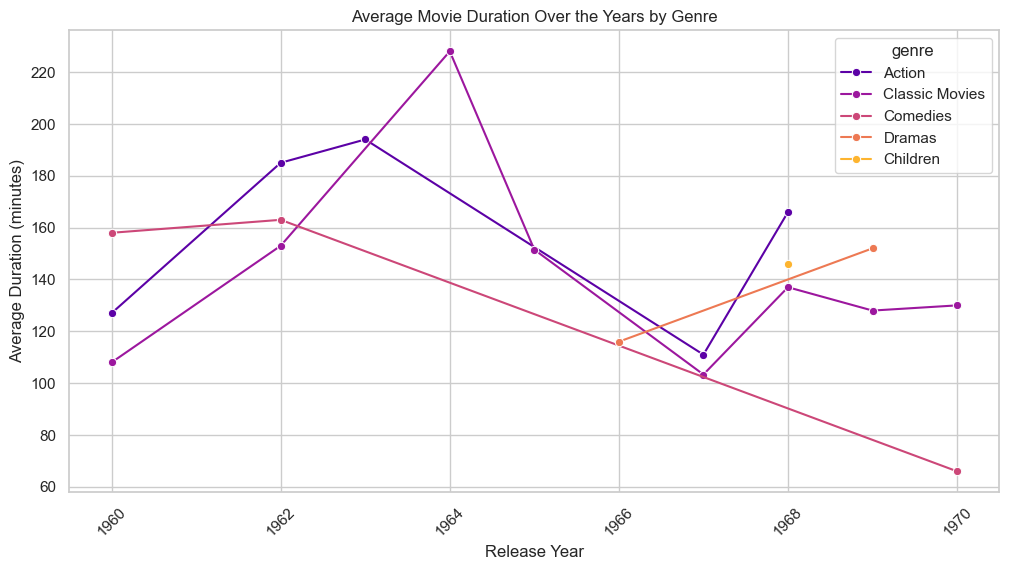

In [640]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_dur_by_yr_gn_60_70, x='release_year', y='duration', palette='plasma', hue='genre', marker='o')
sns.set(style='whitegrid')
plt.title('Average Movie Duration Over the Years by Genre')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

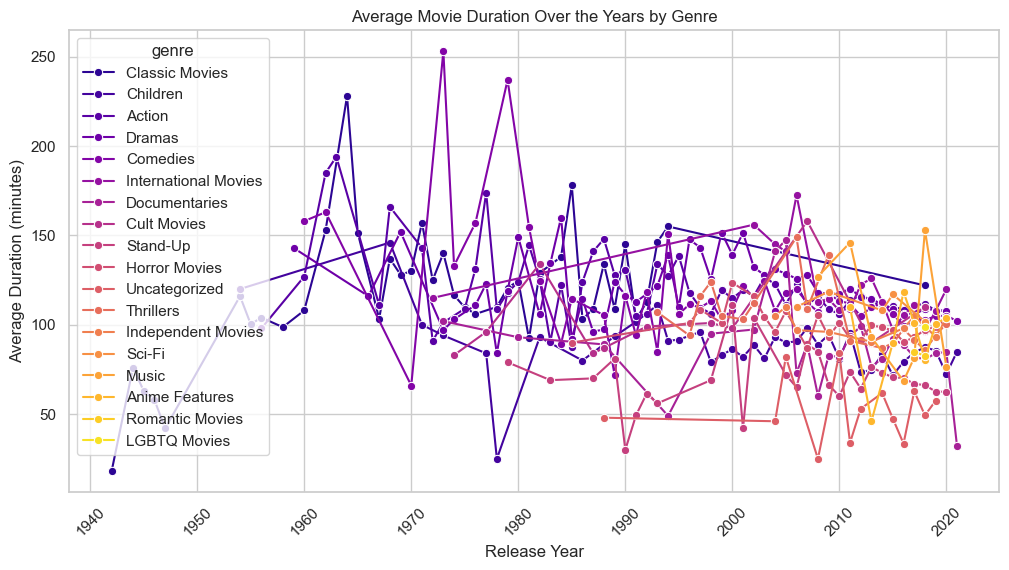

In [471]:
plt.figure(figsize=(12,6))
sns.lineplot(data=average_duration_year_genre, x='release_year', y='duration', palette='plasma', hue='genre', marker='o')
sns.set(style='whitegrid')
plt.title('Average Movie Duration Over the Years by Genre')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Both peaks in 1973 and 1979 show longest average duration from Comedies, indicating  back in 1970s, Comedies were popular for playing long for approximately 4 hours.**

In [501]:
avg_dur_yr_gn_90 = average_duration_year_genre[(average_duration_year_genre['release_year'] >= 1990)].sort_values(by='duration')
# avg_dur_yr_gn_90[avg_dur_yr_gn_90('genre').str.lower() != 'uncategorized']
avg_dur_yr_gn_90

,release_year,genre,duration
246,2008,Uncategorized,25.0
117,1990,Stand-Up,30.0
394,2021,Documentaries,32.0
335,2016,Uncategorized,33.5
278,2011,Uncategorized,34.0
...,...,...,...
362,2018,Music,153.0
138,1994,Classic Movies,155.0
190,2002,International Movies,156.0
231,2007,Cult Movies,158.0


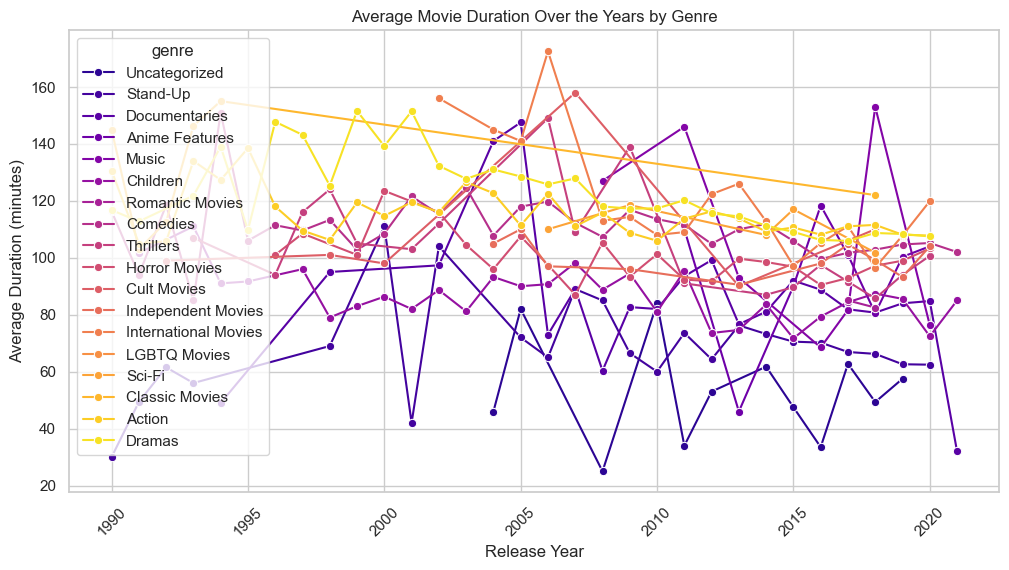

In [493]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_dur_yr_gn_90, x='release_year', y='duration', palette='plasma', hue='genre', marker='o')
sns.set(style='whitegrid')
plt.title('Average Movie Duration Over the Years by Genre')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**The chart shows a lower average duration since 1990, indicating the trend has been changing to movies playing for a shorter time. Also, uncategorized movies appeared a lot more after the 1990s and their average duration is pretty short starting from 25 minutes.**

**The longest average duration appeared after the 1990s is about 3 hours which genre is international movies. Compared to the 1970s, there's an hour decrease in the average duration of movies.**

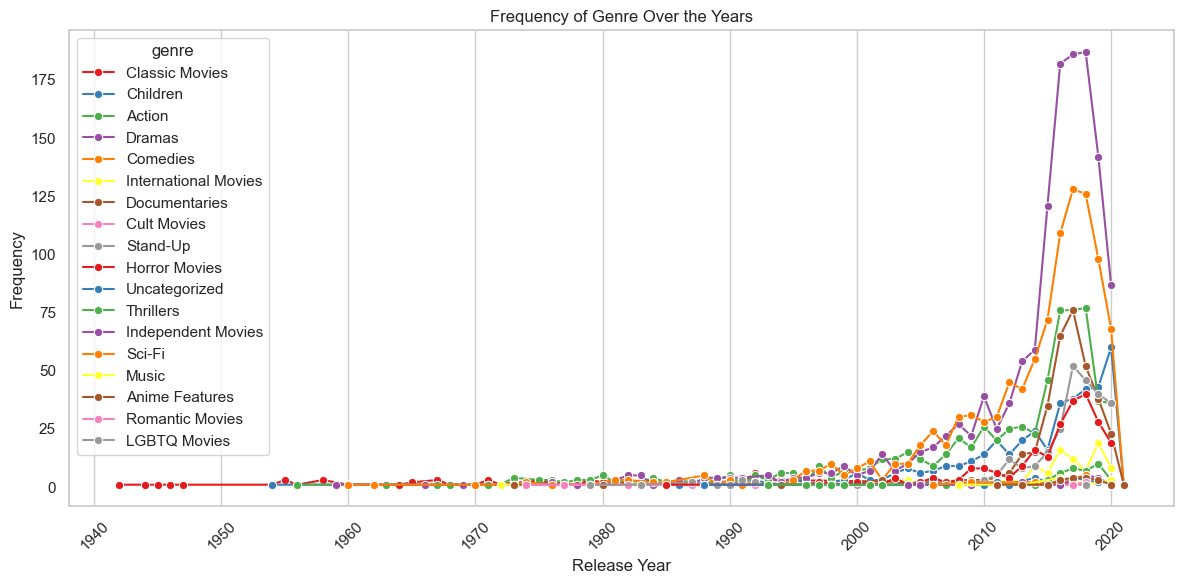

In [535]:
genre_counts = movies_cleaned.groupby(['release_year', 'genre']).size().reset_index(name='frequency')

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_counts, x='release_year', y='frequency', hue='genre', marker='o', palette='Set1')

plt.title('Frequency of Genre Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Drama is the most frequent Genre released after 2010.**

In [583]:
genre_frequency = movies_cleaned['genre'].value_counts(normalize=True)
genre_frequency

genre
Dramas                  0.287150
Comedies                0.220013
Action                  0.148813
Children                0.090015
Documentaries           0.075262
Stand-Up                0.059012
Horror Movies           0.051101
International Movies    0.021381
Classic Movies          0.014753
Thrillers               0.010477
Uncategorized           0.005345
Independent Movies      0.004276
Anime Features          0.003849
Music                   0.002993
Sci-Fi                  0.002352
Cult Movies             0.002352
Romantic Movies         0.000641
LGBTQ Movies            0.000214
Name: proportion, dtype: float64

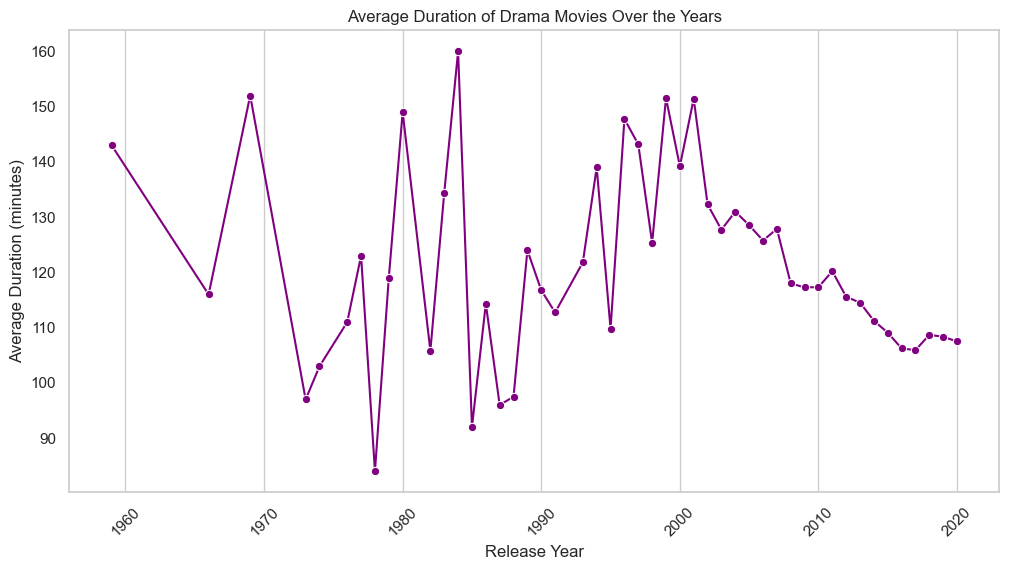

In [603]:
average_duration_year_genre = movies_cleaned.groupby(['release_year','genre'])['duration'].mean().reset_index()
average_duration_year_genre

drama_duration = average_duration_year_genre[average_duration_year_genre['genre'] == 'Dramas']

plt.figure(figsize=(12, 6))
sns.lineplot(data=drama_duration, x='release_year', y='duration', marker='o', color='purple')
plt.title('Average Duration of Drama Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [650]:
drama_duration.sort_values(by='duration', ascending=False).head()

,release_year,genre,duration
85,1984,Dramas,160.000000
28,1969,Dramas,152.000000
168,1999,Dramas,151.555556
181,2001,Dramas,151.428571
69,1980,Dramas,149.000000


**Recent analysis indicates that Drama movies have been trending towards shorter runtimes, averaging around 2 hours (120 minutes) since 2010. This trend suggests a shift in storytelling and production practices in the film industry.**

**Historically, movie durations have varied significantly across genres and time periods. In the past, many films, including Dramas, often exceeded the 2-hour mark. However, a noticeable decline in average duration has been observed in the last decade.**

**Conclusion: The trend towards shorter durations in Drama films signals a significant shift in the industry. As filmmakers adapt to changing audience preferences and competitive landscapes, it will be interesting to see how this trend evolves in the coming years. Continuous monitoring of movie durations and audience reception will provide further insights into the future of film.**